## Regresja liniowa, metoda najmniejszego spadku




## Linear regression, gradient descent method

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


x = np.array([-2.29399323, -1.43363036, -0.52468804, -0.39544295, -0.24097318,
       -0.14898657, -0.0343155 ,  0.19022609,  0.38726758,  0.59190507,
        0.91906829,  1.03690893])

y= np.array([-7.77733551, -4.70740336, -2.41251556,  0.36564371, -1.9492586 ,
       -0.19388007,  0.82003484,  2.6322221 ,  2.26459065,  2.97531505,
        4.8613992 ,  7.20417432])
m = x.shape[0]
# y = 4.2*x + 1.2 + np.random.randn(m)


In [2]:
w, b = 1, 0.1

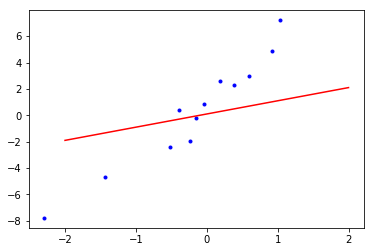

In [3]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,w*xlin+b,'r-')

### Funkcja straty

Funkcją straty będzie suma kwadratów odchyleń przewidywania modelu od rzeczywistej wartości:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2$$

### Loss function

The loss function will be the sum of the squared deviations of model prediction from the actual value:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2$$

In [4]:
L = lambda w,b: 0.5/m*np.sum( (w*x+b-y)**2 )
L(w,b)

4.843228487160661

### Zadanie 1

Oblicz pochodne funkcji strat $L(w,b)$ po parametrach $w$ i $b$. 



$$\frac{\partial L}{\partial w} = \frac{\partial  \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial w}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  x_i
$$

$$\frac{\partial L}{\partial b} = \frac{\partial  \frac{1}{2} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial b}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  
$$

w punkcie $w = 1$, $b = 0.1$.

 - *Uwaga 1:* Oznaczenie `dw`  użyte w kodzie poniżej często się stosuje jako skrót $\frac{\partial L}{\partial w}$. Podobnie  jest z `db`.
 - *Uwaga 2:* Pochodne określa się potocznie mianem "gradientów", ponieważ wagi $w$ w ogólnym przypadku są wektorem.


### Excercise 1

Calculate the derivatives of the $L(w,b)$ loss function after the $w$ and $b$ parameters.



$$\frac{\partial L}{\partial w} = \frac{\partial  \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial w}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  x_i
$$

$$\frac{\partial L}{\partial b} = \frac{\partial  \frac{1}{2} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial b}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  
$$

at $w = 1$, $b = 0.1$.

 - *Note 1:* The designation `dw` used in the code below is often used as the abbreviation $\frac{\partial L}{\partial w}$. Similarly with `db`.
 - *Note 2:* Derivatives are commonly referred to as "gradients" because $w$ weights are in general a vector.

In [5]:
dw, db = None, None

### BEGIN SOLUTION
dw = 1/m*(w*x+b-y).dot(x)
db = 1/m*np.sum(w*x+b-y)
### END SOLUTION


In [6]:
np.testing.assert_approx_equal(-2.5971538397574383, dw,significant=6)
np.testing.assert_approx_equal(-0.4024700533333332 ,db,significant=6)

### Zadanie 2

**Sprawdzanie gradientów**

Oblicz pochodne korzystając ze wzoru na iloraz różnicowy:

$$\frac{df}{dx} \simeq \frac{f(x+h)-f(x)}{h}$$ 

Przyjmij $h=0.001$ (jest to niezbędne, aby wyszły testy).

### Exercise 2

**Gradient checking**

Calculate derivatives using the formula for the quotient:

$$\frac{df}{dx} \simeq \frac{f(x+h)-f(x)}{h}$$

Take $h=0.001$ (it is necessary for them to come out of tests).

In [7]:
dw_num, db_num = None, None

### BEGIN SOLUTION
dw_num = (L(w+0.001,b)-L(w,b))/0.001
db_num = (L(w,b+0.001)-L(w,b))/0.001
### END SOLUTION


In [8]:
np.testing.assert_approx_equal( -2.5967252065637325,dw_num,significant=6)
np.testing.assert_approx_equal(-0.4019700533337556 ,db_num,significant=6)

### Zadanie 3

Zaimplementuj algorytm najmniejszego spadku. W tym celu startując z $w=1$ i $b=0.1$, wykonaj:

1. Oblicz gradienty (pochodne) w punktcie $w,b$ korzystając z implementacji `dw` i `db`.

1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$

Wykonaj 100 takich  kroków z $\alpha=0.1$. Na wykresie zobaczysz efekt takiego działania.




### Exercise 3

Implement the smallest slope algorithm. To do this, starting with $w=1$ and $b=0.1$, do:

1. Calculate the gradients (derivatives) in the $w,b$ point using the implementation of `dw` and` db`.

1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$

Take 100 such steps from $\alpha=0.1$. You will see the effect of this action on the chart.

In [9]:
alpha = 0.1
w, b = 1, 0.1

for i in range(100):
    pass
### BEGIN SOLUTION
    dw = 1/m*(w*x+b-y).dot(x)
    db = 1/m*np.sum(w*x+b-y)

    w = w - alpha*dw
    b = b - alpha*db
### END SOLUTION
    
print(L(w,b),w,b,dw,db)

0.49688099293683835 4.2030070016377605 1.0215427138165052 -0.0008839348807062053 -0.0005649979677355144


In [10]:
np.testing.assert_approx_equal( 4.2030, w, significant=3)
np.testing.assert_approx_equal( 1.0215, b, significant=3)

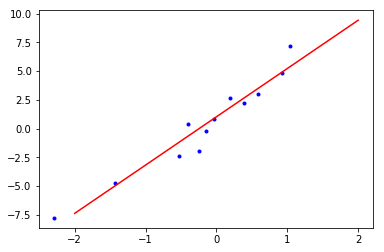

In [11]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,w*xlin+b,'r-')

### Dodatek - automatyczne obliczanie analitycznych gradientów w tensorflow

### Addition - automatic calculation of analytical gradients in tensorflow

In [12]:
import tensorflow as tf

w = tf.Variable([1.0],"w")
b = tf.Variable(0.1,"b")
x_tf = tf.placeholder(tf.float32, shape=(None,1))
y_tf = tf.placeholder(tf.float32, shape=(None))


lin_model =  tf.tensordot(x_tf,w,axes=[1,0]) + b

loss = tf.reduce_mean( 0.5*(lin_model - y_tf)**2 )

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

dw, db = tf.gradients(ys=loss,xs=[w,b])

sess.run([dw,db,loss],feed_dict={x_tf:x[:,np.newaxis],y_tf:y})

[array([-2.5971541], dtype=float32), -0.40247005, 4.843229]

In [13]:
sess.run(loss,feed_dict={x_tf:x[:,np.newaxis],y_tf:y})

4.843229